In [1]:
# Customer Segmentation - OIBSIP


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', 200)
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("raw_customers.csv")   # name your file exactly as saved
display(df.head())
print("Shape:", df.shape)
display(df.info())
display(df.isnull().sum())
display(df.nunique())


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


Shape: (2205, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Acc

None

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [3]:
# drop constant columns if present
for col in ['Z_CostContact','Z_Revenue']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# check and fill missing (dataset from preview had no missing, still safe)
for c in df.columns:
    if df[c].isnull().sum() > 0:
        if df[c].dtype in [np.float64, np.int64]:
            df[c].fillna(df[c].median(), inplace=True)
        else:
            df[c].fillna("Unknown", inplace=True)

# remove duplicates if any
df = df.drop_duplicates()
print("After cleaning:", df.shape)


After cleaning: (2021, 37)


In [4]:
features = [
    'Income', 'Age', 'Customer_Days', 'Recency',
    'MntTotal', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
    'MntFruits', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'Kidhome', 'Teenhome'
]

# keep only features that exist in the dataframe
features = [f for f in features if f in df.columns]
X = df[features].copy()
X.head()


,Income,Age,Customer_Days,Recency,MntTotal,MntWines,MntMeatProducts,MntFishProducts,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kidhome,Teenhome
0,58138.0,63,2822,58,1529,635,546,172,88,88,88,3,8,10,4,7,0,0
1,46344.0,66,2272,38,21,11,6,2,1,1,6,2,1,1,2,5,1,1
2,71613.0,55,2471,26,734,426,127,111,49,21,42,1,8,2,10,4,0,0
3,26646.0,36,2298,26,48,11,20,10,4,3,5,2,2,0,4,6,1,0
4,58293.0,39,2320,94,407,173,118,46,43,27,15,5,5,3,6,5,1,0


,count,mean,std,min,25%,50%,75%,max
Income,2021.0,51687.258783,20713.046401,1730.0,35416.0,51412.0,68274.0,113734.0
Age,2021.0,51.117269,11.667616,24.0,43.0,50.0,61.0,80.0
Customer_Days,2021.0,2511.613063,202.546762,2159.0,2337.0,2511.0,2688.0,2858.0
Recency,2021.0,48.880752,28.950917,0.0,24.0,49.0,74.0,99.0
MntTotal,2021.0,563.789213,576.775749,4.0,55.0,343.0,964.0,2491.0
MntWines,2021.0,306.492331,337.603877,0.0,24.0,178.0,507.0,1493.0
MntMeatProducts,2021.0,166.059871,219.869126,0.0,16.0,68.0,230.0,1725.0
MntFishProducts,2021.0,37.603662,54.892196,0.0,3.0,12.0,50.0,259.0
MntFruits,2021.0,26.364671,39.776518,0.0,2.0,8.0,33.0,199.0
MntSweetProducts,2021.0,27.268679,41.575454,0.0,1.0,8.0,34.0,262.0


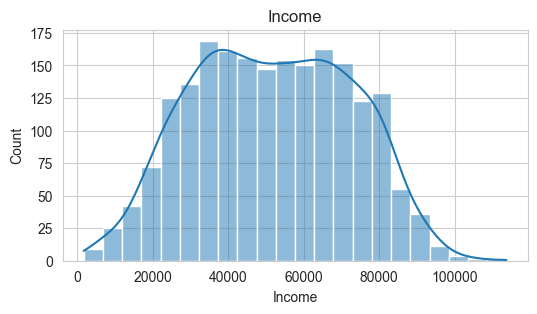

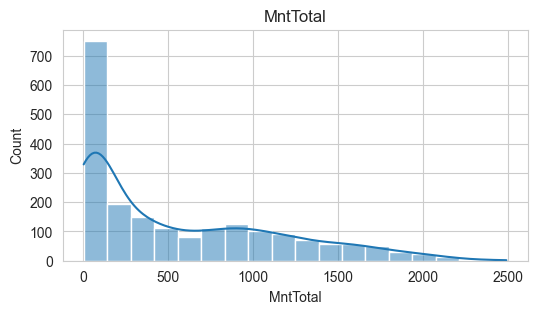

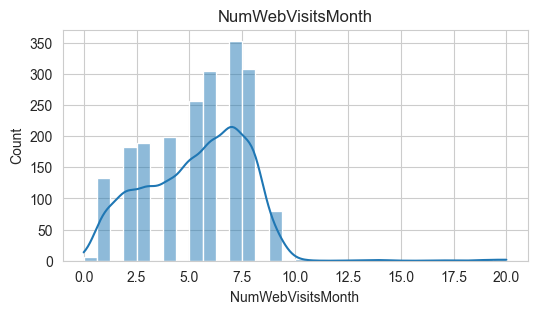

In [5]:
display(X.describe().T)

# Optional: see distributions for key variables
for col in ['Income','MntTotal','NumWebVisitsMonth']:
    if col in X.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(X[col], kde=True)
        plt.title(col)
        plt.show()


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


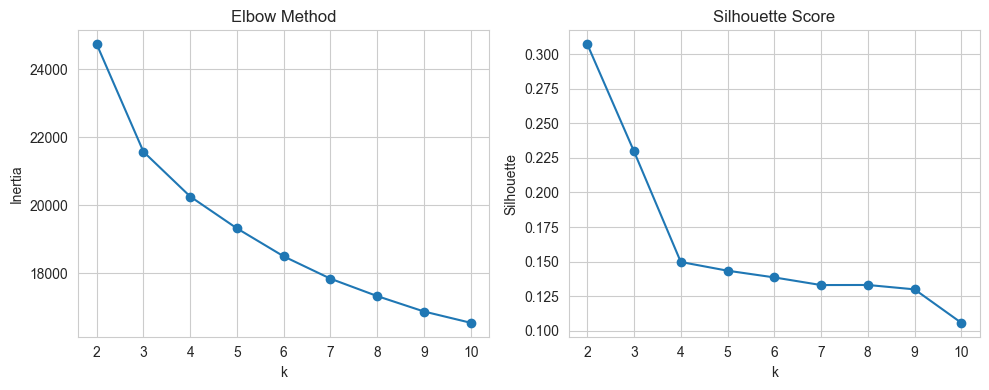

In [7]:
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o'); plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow Method")
plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o'); plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("Silhouette Score")
plt.tight_layout(); plt.show()


In [8]:
k = 4   # change to the k you choose after inspecting plots
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Cluster counts:\n", df['Cluster'].value_counts())


Cluster counts:
 Cluster
0    515
2    514
1    500
3    492
Name: count, dtype: int64


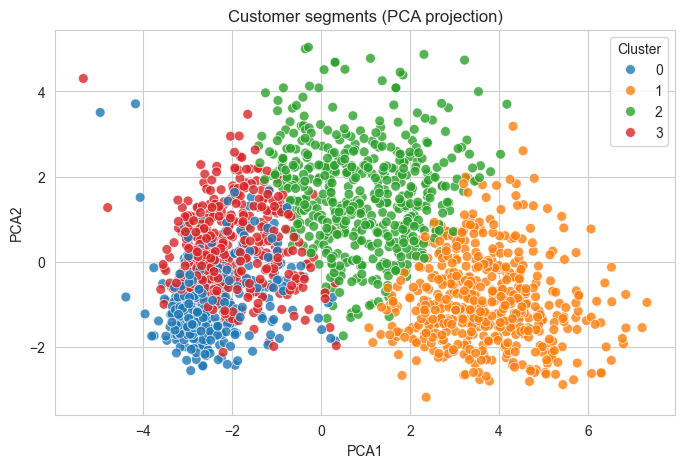

In [9]:
pca = PCA(n_components=2, random_state=42)
pca_comp = pca.fit_transform(X_scaled)
df['PCA1'] = pca_comp[:,0]
df['PCA2'] = pca_comp[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50, alpha=0.8)
plt.title("Customer segments (PCA projection)")
plt.legend(title='Cluster')
plt.show()


In [10]:
cluster_summary = df.groupby('Cluster')[features].mean().T
cluster_sizes = df['Cluster'].value_counts().sort_index()
display(cluster_sizes)
display(cluster_summary)


Cluster
0    515
1    500
2    514
3    492
Name: count, dtype: int64

Cluster,0,1,2,3
Income,29480.600000,76198.462,59151.951362,42223.794715
Age,41.541748,51.588,55.258755,56.335366
Customer_Days,2504.242718,2516.764,2572.338521,2450.652439
Recency,49.034951,49.620,47.340467,49.577236
MntTotal,85.949515,1331.172,729.025292,111.481707
MntWines,34.846602,621.582,497.116732,71.475610
MntMeatProducts,28.147573,464.642,148.326848,25.508130
MntFishProducts,9.790291,101.630,33.834630,5.587398
MntFruits,6.438835,70.164,24.702335,4.447154
MntSweetProducts,6.726214,73.154,25.044747,4.463415


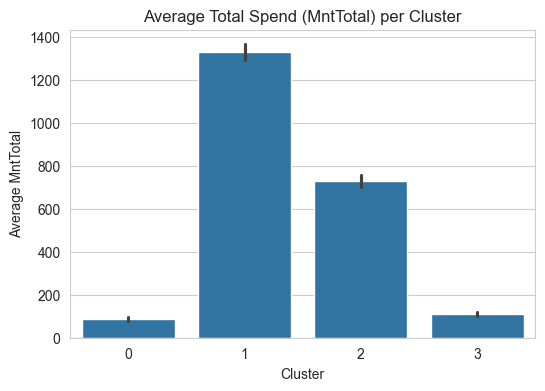

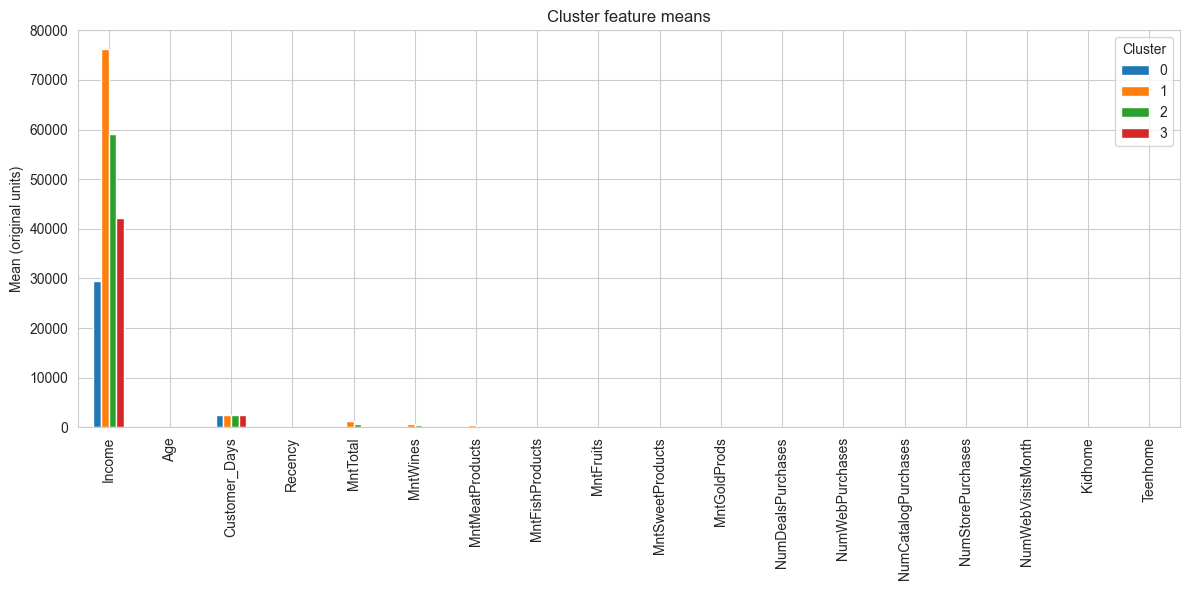

In [11]:
# Bar chart: average MntTotal per cluster
if 'MntTotal' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df['Cluster'], y=df['MntTotal'], estimator=np.mean)
    plt.title("Average Total Spend (MntTotal) per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Average MntTotal")
    plt.show()

# Radar / multiple bar: use cluster_summary (transpose for plotting)
cluster_summary = cluster_summary.fillna(0)
cluster_summary.plot(kind='bar', figsize=(12,6))
plt.title("Cluster feature means")
plt.ylabel("Mean (original units)")
plt.tight_layout()
plt.show()



Response mean per cluster:
 Cluster
0    0.130097
1    0.288000
2    0.138132
3    0.058943
Name: Response, dtype: float64


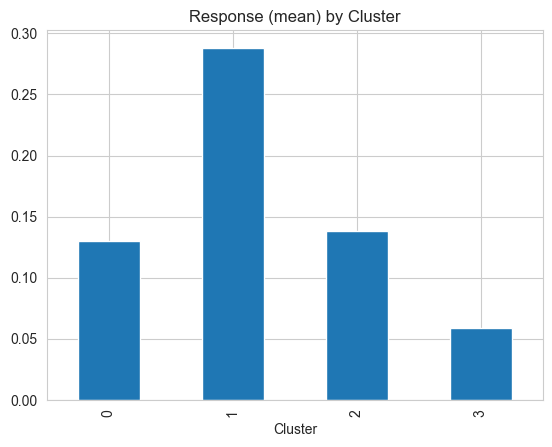


Complain mean per cluster:
 Cluster
0    0.013592
1    0.008000
2    0.007782
3    0.008130
Name: Complain, dtype: float64


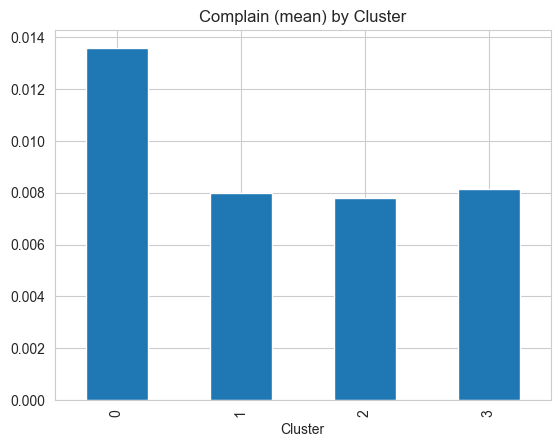


AcceptedCmpOverall mean per cluster:
 Cluster
0    0.097087
1    0.700000
2    0.321012
3    0.093496
Name: AcceptedCmpOverall, dtype: float64


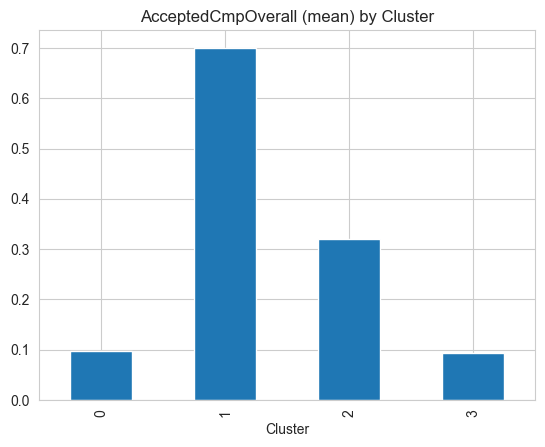

In [12]:
# Proportion of Response or Complain in each cluster (if present)
for col in ['Response','Complain','AcceptedCmpOverall']:
    if col in df.columns:
        prop = df.groupby('Cluster')[col].mean()
        print(f"\n{col} mean per cluster:\n", prop)
        prop.plot(kind='bar', title=f"{col} (mean) by Cluster")
        plt.show()


In [13]:
df.to_csv("segmented_customers.csv", index=False)
cluster_summary.T.to_csv("cluster_summary.csv")
print("Saved segmented_customers.csv and cluster_summary.csv")


Saved segmented_customers.csv and cluster_summary.csv
